### Heart Disease UCI

*Ссылка на датасет: https://www.kaggle.com/ronitf/heart-disease-uci*

Информация об атрибутах:

1. ***age (numerical int)*** : age
2. ***sex (categorical binary)*** : sex
3. ***cp (categorical multivalue)*** : chest pain type (4 values)
4. ***trestbps (numerical int)*** : resting blood pressure
5. ***chol (numerical int)*** : serum cholestoral in mg/dl
6. ***fbs (categorical binary)*** : fasting blood sugar > 120 mg/dl
7. ***restecg (categorical multivalue)*** : resting electrocardiographic results (values 0,1,2)
8. ***thalach (numerical int)*** : maximum heart rate achieved
9. ***exang (categorical binary)*** : exercise induced angina
10. ***oldpeak (numerical float)*** : oldpeak = ST depression induced by exercise relative to rest
11. ***slope (numerical int)*** : the slope of the peak exercise ST segment
12. ***ca (numerical int)*** : number of major vessels (0-3) colored by flourosopy
13. ***thal (numerical int)*** : thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../data/raw/heart.csv'

In [4]:
data = pd.read_csv(DATA_PATH)
print('Rows: {}, columns: {}'.format(*data.shape))

Rows: 303, columns: 14


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Посмотрим на основные статистики датасета (заметим, что нет пропущенных значений):

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Посмотрим на распределение в атрибутах:

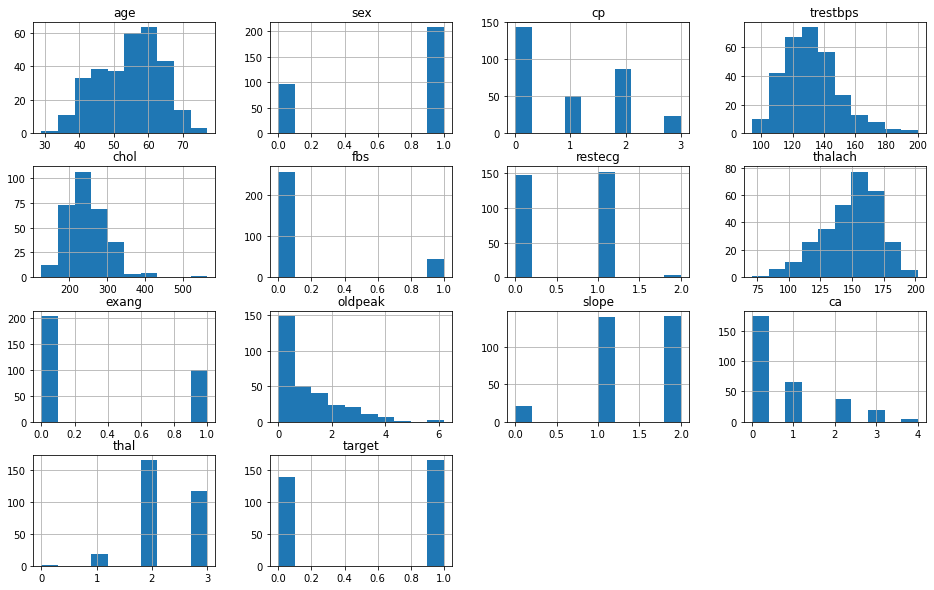

In [7]:
data.hist(figsize=(16, 10))
plt.show()

Визуализируем парные корреляции:

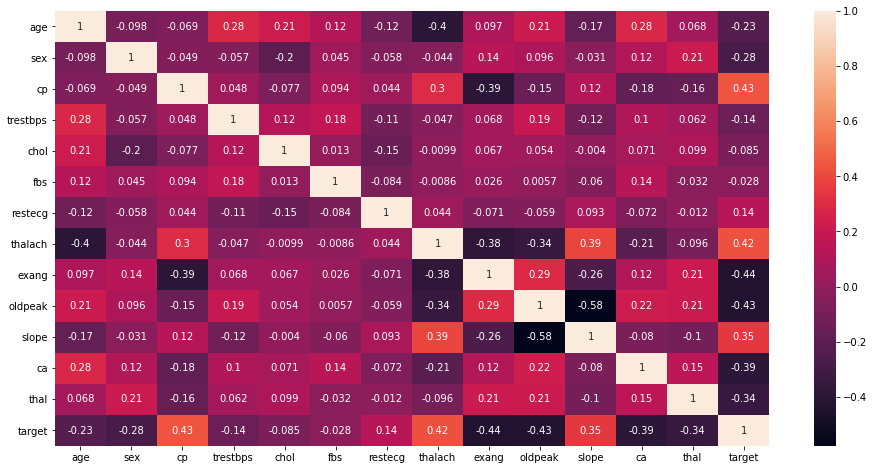

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Отсорируем от наибольшей корреляции с таргетом до наименьшей:

In [9]:
data.corr().iloc[-1, :-1].sort_values(key=lambda x: -abs(x))

exang      -0.436757
cp          0.433798
oldpeak    -0.430696
thalach     0.421741
ca         -0.391724
slope       0.345877
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
restecg     0.137230
chol       -0.085239
fbs        -0.028046
Name: target, dtype: float64